In [5]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


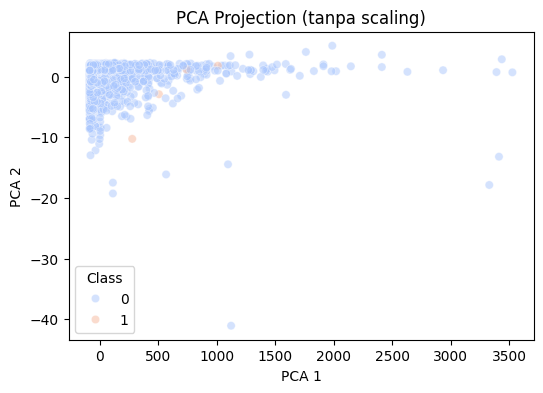

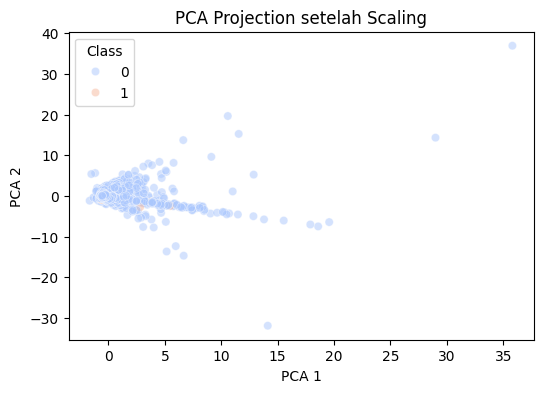

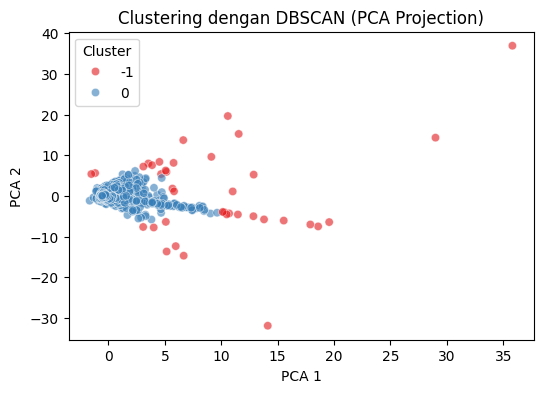

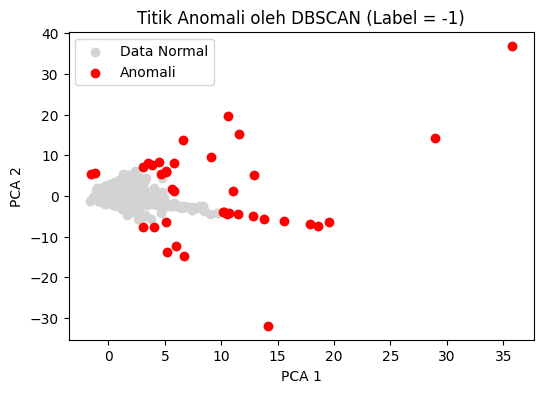

In [6]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Load dataset
df = pd.read_csv("creditcard.csv")

# Ambil fitur tanpa kolom Time dan Class
X = df.drop(columns=["Time", "Class"])
y = df["Class"]

# Ambil sampel 5000 data agar ringan
subset = X.sample(n=5000, random_state=42)
subset_y = y.loc[subset.index]

# PCA tanpa scaling
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(subset)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca_raw[:, 0], y=X_pca_raw[:, 1], hue=subset_y, palette='coolwarm', alpha=0.5)
plt.title("PCA Projection (tanpa scaling)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Class")
plt.show()

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

# PCA setelah scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=subset_y, palette='coolwarm', alpha=0.5)
plt.title("PCA Projection setelah Scaling")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Class")
plt.show()

# Clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(X_pca)

# Visualisasi hasil clustering
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title("Clustering dengan DBSCAN (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Visualisasi anomali (label = -1)
anomali = X_pca[labels == -1]
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='lightgray', label='Data Normal')
plt.scatter(anomali[:, 0], anomali[:, 1], color='red', label='Anomali')
plt.title("Titik Anomali oleh DBSCAN (Label = -1)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()
